In [1]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.init as init
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchinfo import summary
import seaborn as sns
import matplotlib.pyplot as plt
from ptflops import get_model_complexity_info
import os
from utils import *
from custom_layer import *
from base_model import *
import json

In [2]:
torch.set_num_threads(6)
# torch.set_num_interop_threads(1)
torch.backends.mkldnn.enabled = True

In [3]:
state = json.load(open('../../../dataset/DogVsCatDataset/preprocessed/final_split1/dataset_splits.json', 'r'))

criterion = torch.nn.CrossEntropyLoss()
train_dataset = SplitLoader("../../../dataset/DogVsCatDataset/preprocessed/final_split1/",state["train80"], batch_size=40)
test_dataset = SplitLoader("../../../dataset/DogVsCatDataset/preprocessed/final_split1/",state["test20"], batch_size=40)

In [4]:
model4_0 = Model2(
    norm=nn.BatchNorm2d(10),
    post_conv=post_conv0,
)
he_initialization(model4_0)
describe(model4_0)

MACs: 9.25 MMac, Params: 3.15 k
Layer (type:depth-idx)                   Output Shape              Param #
Model2                                   [1, 2]                    --
├─BatchNorm2d: 1-1                       [1, 10, 128, 128]         20
├─Sequential: 1-2                        [1, 10, 64, 64]           --
│    └─Conv2d: 2-1                       [1, 20, 64, 64]           1,000
│    └─Sequential: 2-2                   [1, 20, 64, 64]           --
│    │    └─BatchNorm2d: 3-1             [1, 20, 64, 64]           40
│    │    └─PReLU: 3-2                   [1, 20, 64, 64]           1
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           990
│    └─Sequential: 2-4                   [1, 10, 64, 64]           --
│    │    └─BatchNorm2d: 3-3             [1, 10, 64, 64]           20
│    │    └─PReLU: 3-4                   [1, 10, 64, 64]           1
├─Sequential: 1-3                        [1, 1, 16, 16]            --
│    └─Conv2d: 2-5                       [1, 2, 32,

Loading checkpoint from model_weights/model4_0.pt
Starting
Epoch 1/10: Train loss = 0.6416, Train accuracy = 0.6175, Test loss = 0.6406, Test accuracy = 0.6178


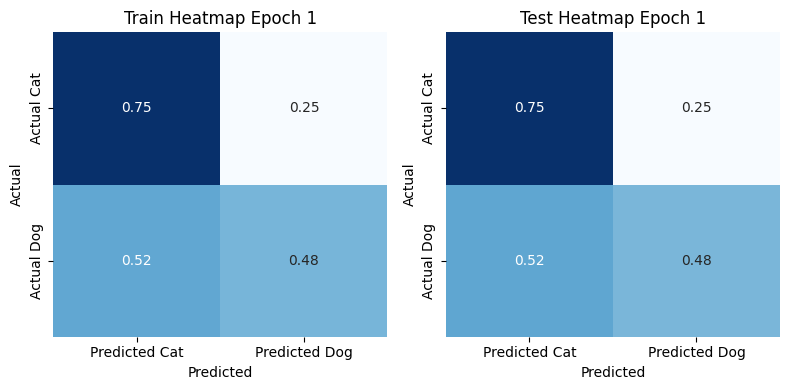

Epoch 2/10: Train loss = 0.5985, Train accuracy = 0.6684, Test loss = 0.6071, Test accuracy = 0.6583


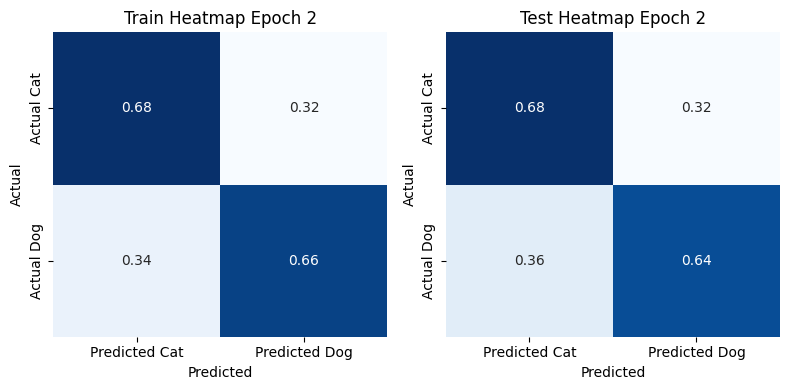

Epoch 3/10: Train loss = 0.5606, Train accuracy = 0.7100, Test loss = 0.5698, Test accuracy = 0.7022


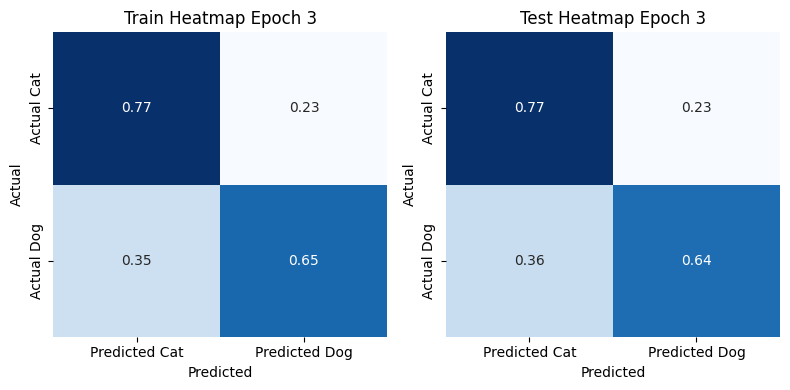

Epoch 4/10: Train loss = 0.5339, Train accuracy = 0.7308, Test loss = 0.5430, Test accuracy = 0.7191


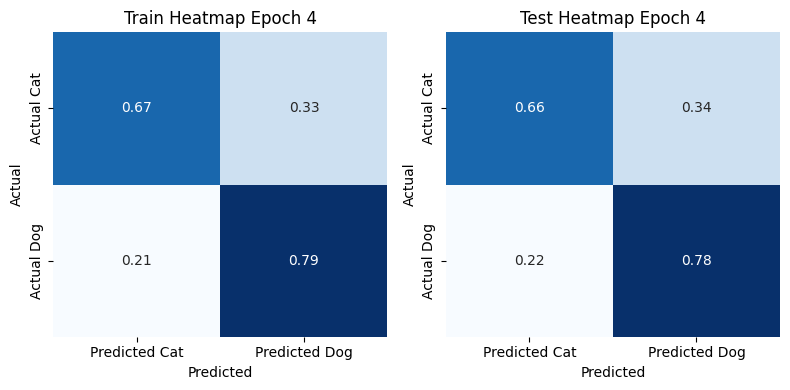

Epoch 5/10: Train loss = 0.5095, Train accuracy = 0.7515, Test loss = 0.5141, Test accuracy = 0.7464


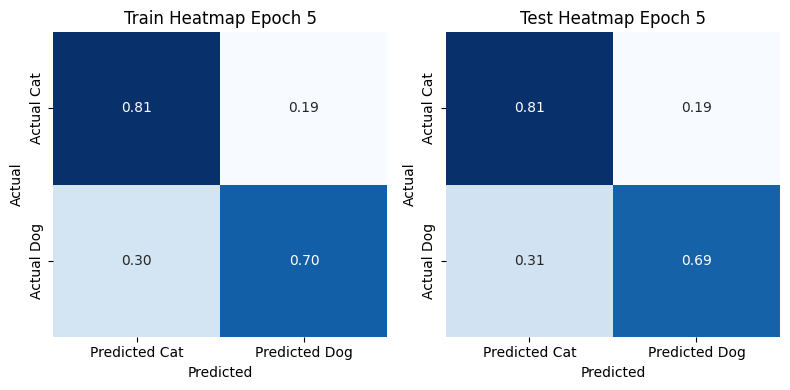

Epoch 6/10: Train loss = 0.4880, Train accuracy = 0.7671, Test loss = 0.4979, Test accuracy = 0.7576


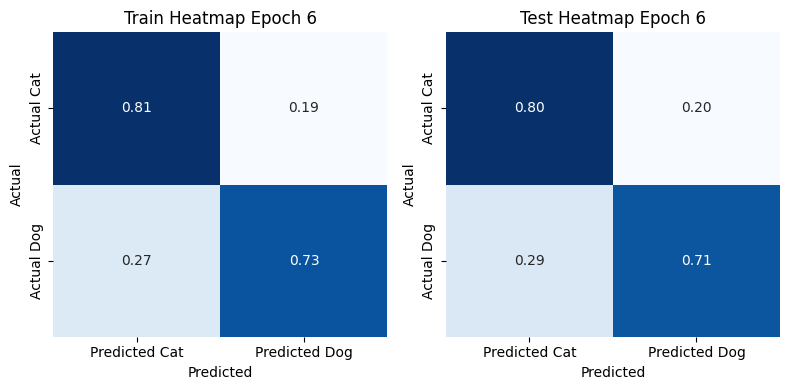

Epoch 7/10: Train loss = 0.4786, Train accuracy = 0.7705, Test loss = 0.4854, Test accuracy = 0.7647


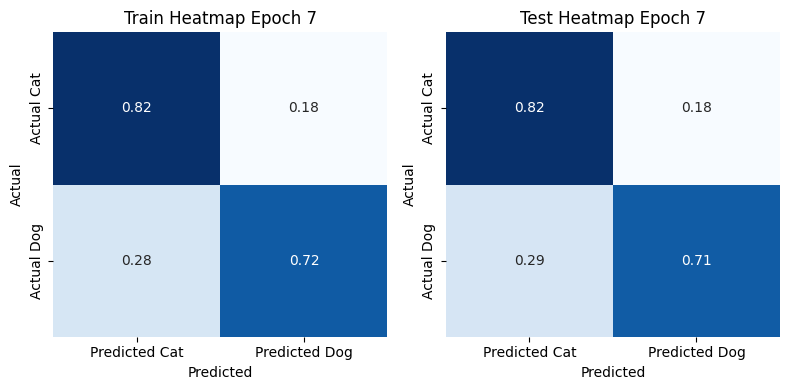

Epoch 8/10: Train loss = 0.4615, Train accuracy = 0.7841, Test loss = 0.4770, Test accuracy = 0.7763


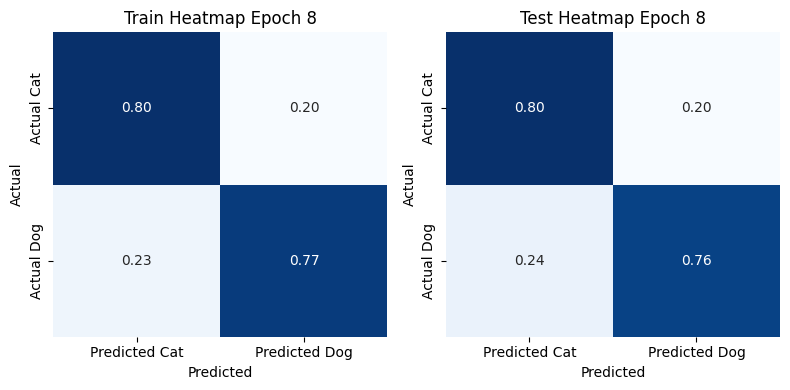

Epoch 9/10: Train loss = 0.4582, Train accuracy = 0.7853, Test loss = 0.4780, Test accuracy = 0.7755


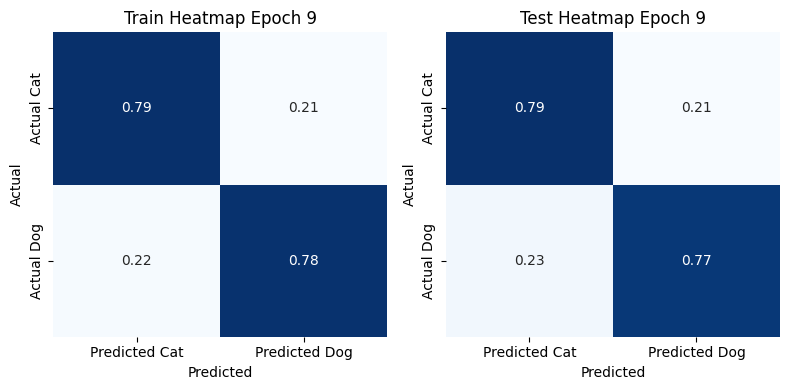

Epoch 10/10: Train loss = 0.4576, Train accuracy = 0.7870, Test loss = 0.4767, Test accuracy = 0.7738


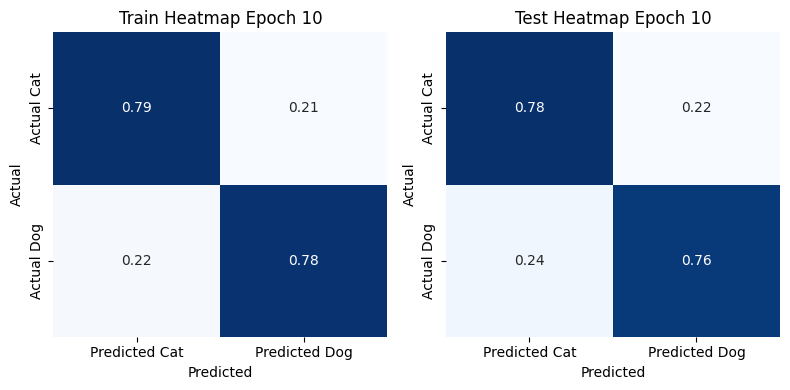

Training complete.


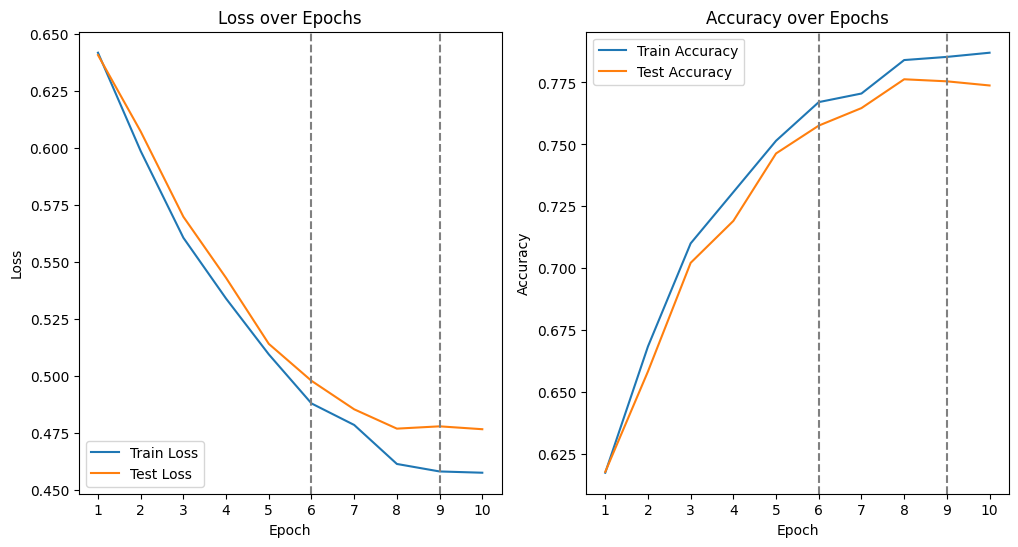

In [5]:
train(model4_0,"model_weights/model4_0.pt",criterion,train_dataset,test_dataset)